In [7]:
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout, Flatten
import xlrd
import math

In [8]:
# !pip install xlrd==1.2.0

In [9]:
#import excel worksheet
#1272 rows x 35 cols
df = pd.read_excel("movieData.xlsx")
print(df.shape)
# data.head()

(6083, 15)


In [10]:
#Isolate columns
# IMDb score - dependent
# Metascore  - dependent
# Genre- assign ids to different genre
# Number of genres
# Country - number of countries
# Budget 
# Runtime 
# Worldwide income
# USA income
imdbScores = df["avg_vote"]
metaScores = df["metascore"]
genres = df["genre"]
countries = df["country"]
budgets = df["budget"]
runtimes = df["duration"]
worldIncome = df["worlwide_gross_income"]
usaIncome = df["usa_gross_income"]



In [11]:
train_length = int(df.shape[0]*0.8)

test_length = df.shape[0]-train_length

print(train_length, test_length)

4866 1217


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
#Create numCountries array
numCountries = []

for item in countries:
    numCountries.append([float(item.count(",")+1)])  

numCountries = scaler.fit_transform(numCountries)
print(numCountries[:50])
print(len(numCountries))

[[0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.07692308]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.07692308]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.07692308]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.        ]
 [0.15384615]
 [0.07692308]]
6083


In [14]:
#Create numGenres array
numGenres = []
for item in genres:
    numGenres.append([float(item.count(",")+1)])
# normMax = max(numGenres)
# print(normMax)
# for i in range(len(numGenres)):
#     numGenres[i] /= normMax
numGenres = scaler.fit_transform(numGenres)
print(numGenres[:50])
print(len(numGenres))

[[1. ]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [0.5]
 [1. ]
 [1. ]
 [1. ]
 [0.5]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [0. ]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [0.5]
 [1. ]
 [0.5]
 [0.5]
 [1. ]
 [0.5]
 [1. ]
 [1. ]
 [0. ]
 [0.5]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [0.5]
 [1. ]
 [1. ]
 [0.5]
 [1. ]
 [1. ]
 [1. ]
 [1. ]
 [0. ]
 [1. ]
 [0.5]
 [0.5]
 [1. ]
 [0. ]]
6083


In [15]:
#create normalized runtimes
print(max(runtimes))
normRuntimes = []
for item in runtimes:
    normRuntimes.append([float(item)])
normRuntimes = scaler.fit_transform(normRuntimes)
print(normRuntimes[:20])

238
[[0.15168539]
 [0.15168539]
 [0.19101124]
 [0.12921348]
 [1.        ]
 [0.38764045]
 [0.23595506]
 [0.36516854]
 [0.15730337]
 [0.33146067]
 [0.23595506]
 [0.3258427 ]
 [0.61797753]
 [0.37078652]
 [0.43820225]
 [0.07865169]
 [0.15730337]
 [0.30337079]
 [0.34831461]
 [0.24157303]]


In [16]:
#create normalized budgets
print(max(budgets))
# normMax = max(budgets)
normBudgets = []
for item in budgets:
    normBudgets.append([float(item)])
normBudgets = scaler.fit_transform(normBudgets)
print(normBudgets[:20])

356000000
[[0.0041995 ]
 [0.0041995 ]
 [0.0001545 ]
 [0.00419669]
 [0.01115746]
 [0.00532311]
 [0.00778663]
 [0.00639054]
 [0.00728943]
 [0.00234477]
 [0.00265453]
 [0.13481931]
 [0.00588491]
 [0.00841304]
 [0.00391859]
 [0.00813214]
 [0.00068821]
 [0.00763748]
 [0.0041995 ]
 [0.00712313]]


In [95]:
#create normalized world income and usa income
# normMax = max(usaIncome)
# print(normMax)
normUSAIncome = []
for item in usaIncome:
    normUSAIncome.append([float(item)])
# print(normUSAIncome[:20])
normUSAIncome = scaler.fit_transform(normUSAIncome)
print(normUSAIncome)
# normMax = max(worldIncome)
# print(normMax)
normWorldIncome = []
for item in worldIncome:
    normWorldIncome.append([float(item)])
normWorldIncome = scaler.fit_transform(normWorldIncome)
print(normWorldIncome[:20])
print(min(worldIncome))
print(max(worldIncome))

[[2.03766111e-05]
 [1.74536788e-04]
 [1.66335325e-04]
 ...
 [6.98871428e-03]
 [8.32599905e-03]
 [1.05357371e-02]]
[[1.64103911e-05]
 [1.63554551e-04]
 [5.56866016e-05]
 [6.60967046e-02]
 [1.43810285e-01]
 [5.16988261e-05]
 [9.34374602e-03]
 [2.73112064e-02]
 [4.35670633e-02]
 [5.69737556e-04]
 [1.56360900e-03]
 [2.71709701e-02]
 [8.45540104e-03]
 [7.69175652e-05]
 [5.37361408e-05]
 [3.40004375e-02]
 [1.66963300e-05]
 [9.74065174e-05]
 [1.13339033e-05]
 [6.66268742e-04]]
95
2797800564


In [18]:
#create normalized votes
votes = df["votes"]
normVotes = []
# votesMax = max(votes)
# print(votesMax)
for item in votes:
    normVotes.append([float(item)])
normVotes = scaler.fit_transform(normVotes)
print(normVotes[:20])

[[0.07133491]
 [0.09265468]
 [0.00266157]
 [0.07769328]
 [0.12456939]
 [0.04582904]
 [0.1606939 ]
 [0.03803873]
 [0.05595354]
 [0.17079996]
 [0.22373778]
 [0.03411418]
 [0.0246475 ]
 [0.04887064]
 [0.05157215]
 [0.06233692]
 [0.06498269]
 [0.01299978]
 [0.00137138]
 [0.09348936]]


In [90]:
#x_train -> [numGenres, numCountries, budget, runtime, wwIncome, usaIncome]
x_train = []
for i in range(train_length):
    # print(float(usaIncome[i]))
    # print(type(numGenres[i]))
    # print(type(numCountries[i]))
    # print(type(runtimes[i]))
    # print(type(budgets[i]))
    # print(type(worldIncome[i]))
    # print(type(usaIncome[i]))



    # x_train.append([float(numGenres[i]), float(numCountries[i]), float(normRuntimes[i]), float(normBudgets[i])])
    x_train.append([float(numGenres[i]), float(numCountries[i]), float(normRuntimes[i])])




    # x_train.append([float(normBudgets[i]), float(normWorldIncome[i]), float(normUSAIncome[i])])

    # x_train.append([float(normRuntimes[i]), float(normVotes[i]), float(normBudgets[i])])

    

print(x_train[:15])

[[1.0, 0.0, 0.15168539325842695], [1.0, 0.0, 0.15168539325842695], [1.0, 0.0, 0.19101123595505615], [1.0, 0.0, 0.1292134831460674], [1.0, 0.0, 1.0], [0.5, 0.0, 0.38764044943820225], [1.0, 0.0, 0.23595505617977525], [1.0, 0.0, 0.36516853932584264], [1.0, 0.0, 0.15730337078651685], [0.5, 0.0, 0.33146067415730335], [1.0, 0.0, 0.23595505617977525], [1.0, 0.0, 0.32584269662921345], [1.0, 0.0, 0.6179775280898876], [1.0, 0.07692307692307693, 0.37078651685393255], [0.0, 0.0, 0.43820224719101125]]


In [91]:
#x_test
x_test = []
for i in range(train_length, df.shape[0]):
        # x_test.append([float(numGenres[i]), float(numCountries[i]), float(normRuntimes[i]), float(normBudgets[i])])
        x_test.append([float(numGenres[i]), float(numCountries[i]), float(normRuntimes[i])])
        # x_test.append([float(normBudgets[i]), float(normWorldIncome[i]), float(normUSAIncome[i])])

        # x_test.append([float(normRuntimes[i]), float(normVotes[i]), float(normBudgets[i]), float()])

    

print(x_test[:15])

[[0.5, 0.07692307692307693, 0.19101123595505615], [1.0, 0.0, 0.17977528089887634], [1.0, 0.0, 0.33146067415730335], [1.0, 0.07692307692307693, 0.21910112359550565], [1.0, 0.07692307692307693, 0.21910112359550565], [0.0, 0.0, 0.18539325842696625], [0.5, 0.0, 0.34831460674157305], [1.0, 0.07692307692307693, 0.24719101123595505], [0.5, 0.0, 0.14606741573033705], [1.0, 0.15384615384615385, 0.21348314606741575], [1.0, 0.0, 0.21348314606741575], [1.0, 0.0, 0.17415730337078655], [0.5, 0.3076923076923077, 0.11235955056179775], [0.5, 0.0, 0.19662921348314605], [0.0, 0.0, 0.14606741573033705]]


In [72]:
#y_train
y_train = []
y_trainTemp = []
for i in range(train_length):
    y_train.append(float(imdbScores[i])/10)
    # y_train.append(float(metaScores[i]/100))
    # y_train.append(float(normWorldIncome[i]))
# y_trainTemp = scaler.fit_transform(y_trainTemp)
# for item in y_trainTemp:
#     y_train.append(item[0])
# y_train
print(y_train[:15])


[0.85, 0.85, 0.77, 0.76, 0.8099999999999999, 0.8099999999999999, 0.8, 0.78, 0.74, 0.8300000000000001, 0.85, 0.64, 0.8, 0.82, 0.82]


In [73]:
#y_test
y_test = []
y_testTemp = []
for i in range(train_length, df.shape[0]):
    # y_test.append(float(normWorldIncome[i]))
    y_test.append(float(imdbScores[i]/10))
    # y_test.append(float(metaScores[i]/100))
    # y_testTemp.append([float(imdbScores[i])])
# y_testTemp = scaler.fit_transform(y_testTemp)
# print(y_testTemp.shape)
# print(y_testTemp[:15])
# print(type(y_testTemp))
# for item in y_testTemp:
    # y_test.append(item[0])
    # y_test.insert(i, y_test[i][0])
print(y_test[:15])

# y_test
# len(y_test)

[0.43, 0.65, 0.6599999999999999, 0.6799999999999999, 0.61, 0.36, 0.6, 0.55, 0.5900000000000001, 0.73, 0.64, 0.5700000000000001, 0.72, 0.5700000000000001, 0.45999999999999996]


In [84]:
def simpleModel(): 
    model = Sequential()
    model.add(Flatten())
    model.add(Dense(4, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(50, activation='sigmoid'))
    model.add(Dropout(0.2))
    model.add(Dense(50, activation='sigmoid'))
    model.add(Dropout(0.2))

    model.add(Dense(1))

    model.compile(loss='mean_squared_logarithmic_error', optimizer='adam')

    model.fit(x_train, y_train, epochs=100, batch_size=50, validation_data=(x_test, y_test))

    return model


In [92]:
model = simpleModel()

score = model.evaluate(x_test, y_test, verbose=0)

print(score)
# print("Test loss: " + str(score[0]))
# print("Test accuracy" + str(score[1]))

Epoch 1/100
98/98 [==============================] - 0s 5ms/step - loss: 0.0498 - val_loss: 0.0069
Epoch 2/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0251 - val_loss: 0.0037
Epoch 3/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0133 - val_loss: 0.0036
Epoch 4/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0099 - val_loss: 0.0035
Epoch 5/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0079 - val_loss: 0.0035
Epoch 6/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 0.0035
Epoch 7/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0064 - val_loss: 0.0036
Epoch 8/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0061 - val_loss: 0.0035
Epoch 9/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0060 - val_loss: 0.0035
Epoch 10/100
98/98 [==============================] - 0s 1ms/step - loss: 0.0056 - val_loss: 0.0035
Epoch 11/

In [25]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 5)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 30        
_________________________________________________________________
dropout_3 (Dropout)          (None, 5)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 50)                300       
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)               

In [93]:
prediction = model.predict(np.array(x_test))
# len(prediction), len(y_test)

for i in range(75):
    print(str(prediction[i]) + " vs " + str(y_test[i]))

# print(prediction[:50])

[0.6204666] vs 0.43
[0.61318886] vs 0.65
[0.6661604] vs 0.6599999999999999
[0.623098] vs 0.6799999999999999
[0.623098] vs 0.61
[0.6232258] vs 0.36
[0.6837723] vs 0.6
[0.63312525] vs 0.55
[0.61153966] vs 0.5900000000000001
[0.62337285] vs 0.73
[0.61911464] vs 0.64
[0.61295426] vs 0.5700000000000001
[0.6100849] vs 0.72
[0.6202028] vs 0.5700000000000001
[0.6113322] vs 0.45999999999999996
[0.6103552] vs 0.62
[0.62996155] vs 0.6
[0.6202028] vs 0.53
[0.61232364] vs 0.61
[0.61090493] vs 0.55
[0.65594417] vs 0.67
[0.6209505] vs 0.6799999999999999
[0.6124844] vs 0.7
[0.6876498] vs 0.71
[0.69510126] vs 0.54
[0.7538829] vs 0.76
[0.62996155] vs 0.53
[0.64078027] vs 0.62
[0.6635708] vs 0.5700000000000001
[0.6232258] vs 0.58
[0.6493667] vs 0.58
[0.6269823] vs 0.51
[0.65594417] vs 0.63
[0.6106678] vs 0.37
[0.6144112] vs 0.71
[0.68723077] vs 0.45
[0.6858514] vs 0.73
[0.6275658] vs 0.65
[0.66273326] vs 0.71
[0.675829] vs 0.61
[0.63710624] vs 0.61
[0.6555039] vs 0.7
[0.64531326] vs 0.72
[0.6403248] vs 0

In [88]:
def accuracy():
    errThreshold = 0.1
    accCount = 0
    for i in range(len(prediction)):
        if abs(prediction[i]-y_test[i]) <= errThreshold:
            accCount += 1
    print(accCount/len(prediction))

In [94]:
accuracy()

0.7748562037797864


In [27]:
import matplotlib.pyplot as plt


*Please ignore the graphs below they're just for decoration*

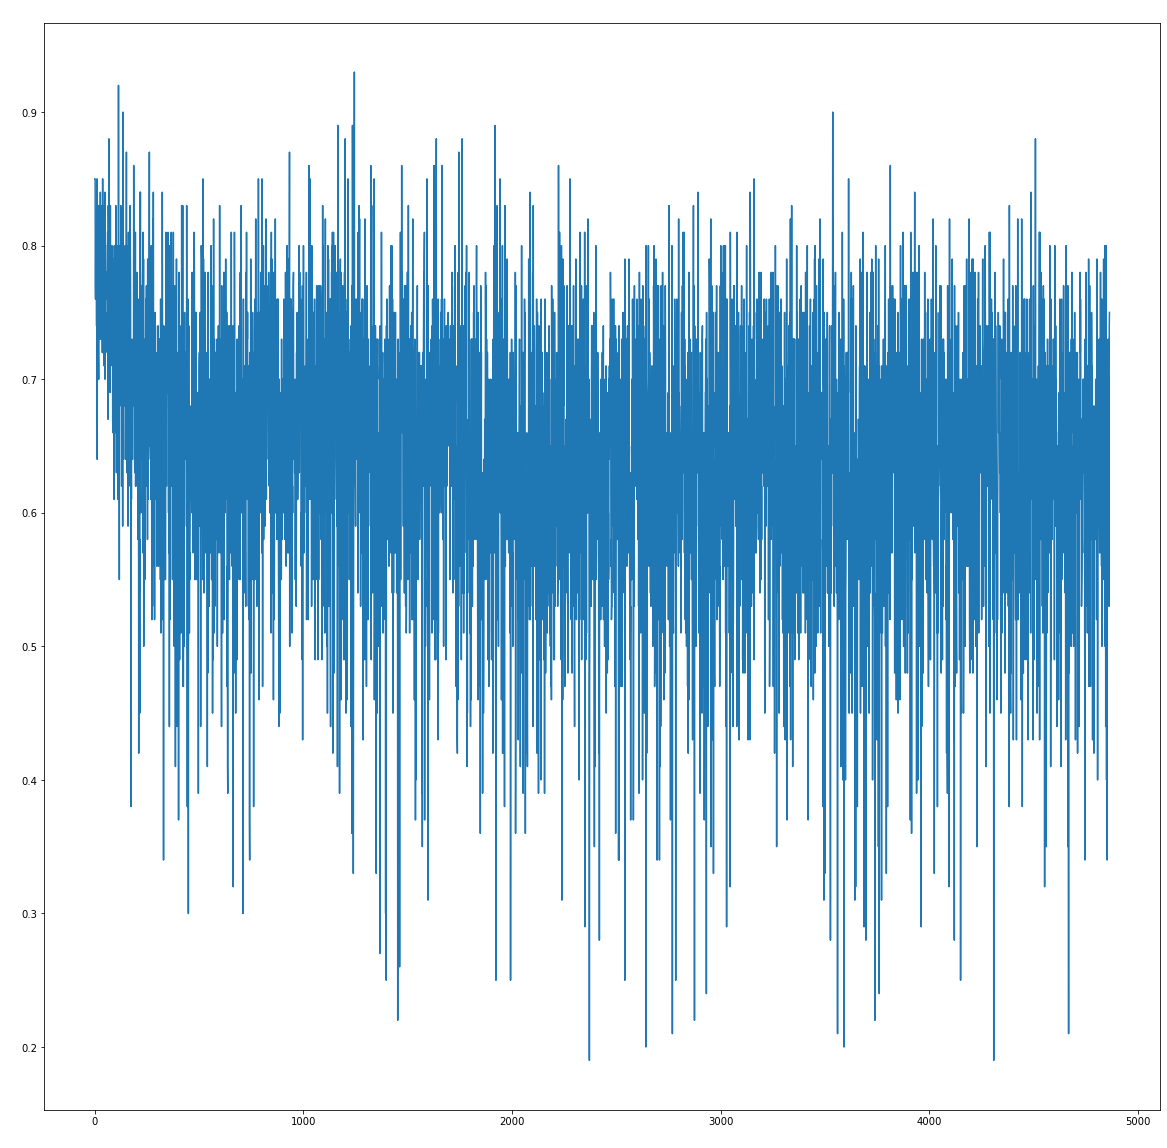

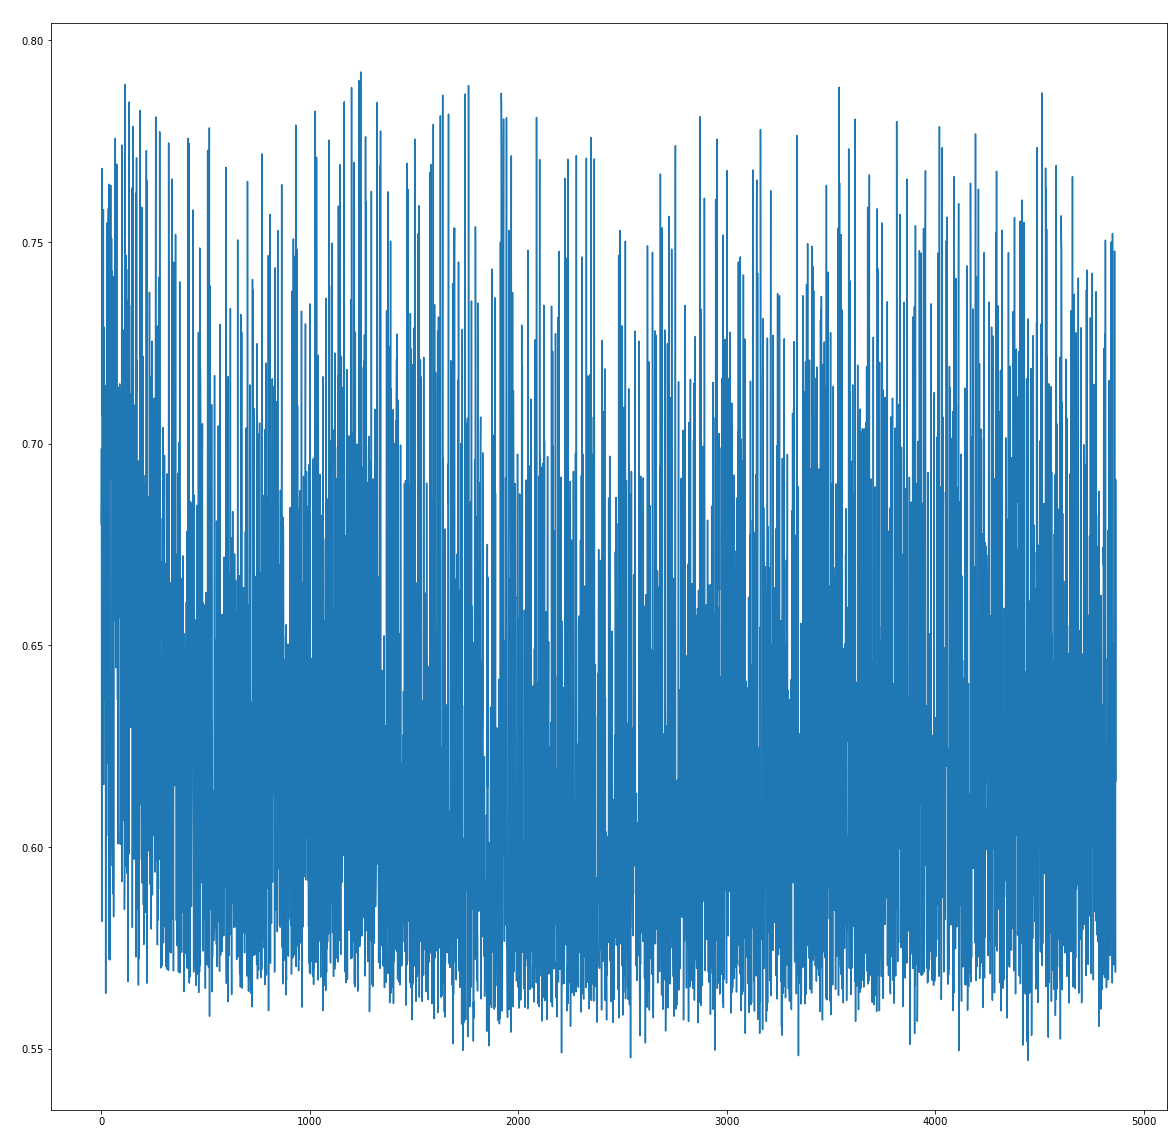

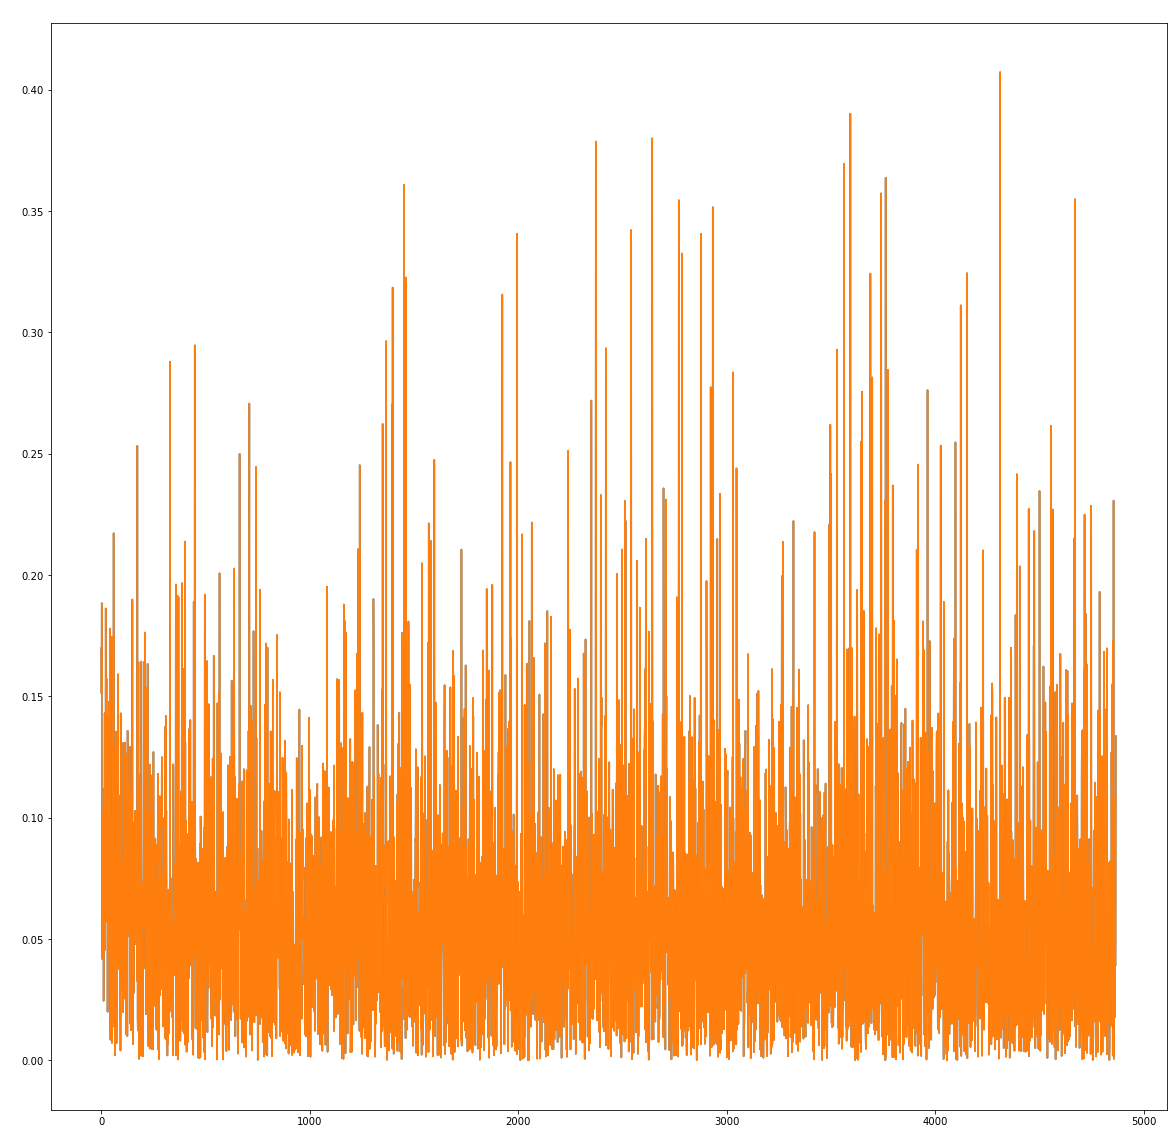

In [36]:
import matplotlib.pyplot as plt

movieNums = []
for i in range(len(y_train)):
    movieNums.append(i)
plt.figure(figsize=(20,20))

plt.title('Prediction vs Actual', c='white')
plt.xlabel('Movie number', c='white')
plt.ylabel('IMDB Score', c='white')
# plt.axes.tick_params(axis="x", color="red")
plt.plot(movieNums, y_train)

plt.show()

plt.figure(figsize=(20,20))
plt.title('Prediction vs Actual', c='white')
plt.xlabel('Movie number', c='white')
plt.ylabel('IMDB Score', c='white')
plt.plot(movieNums, prediction)

plt.show()

error = []
for i in range(len(y_train)):
    error.append([abs(prediction[i][0]-y_train[i]), abs(prediction[i][0]-y_train[i])])

plt.figure(figsize=(20,20))
plt.title('Error', c='white')
plt.xlabel('Movie number', c='white')
plt.ylabel('Score Error', c='white')
plt.plot(movieNums, error)

plt.show()